# Analítica para tres o más variables

Continuamos con el análisis de los datos del cuaderno anterior, ahora enfocándonos en tres o más variables.

In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.dpi'] = 100 # Para mejorar la resolución gráfica
plt.rcParams['savefig.dpi'] = 100 # Para mejorar la resolución gráfica

In [2]:
datos = pd.read_csv("newdata.csv")
datos.head()

,Moment,number,web,Name of Provider,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Latitude,Longitude,Typical Traffic Afternoon,Typical Traffic Noon,Typical Traffic Morning,DailyTraffic,ClientLatitude,ClientLongitude,Distance(mts),Time(sec),Time(min)
0,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.665798,-74.040855,2500,660,11
1,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.666159,-74.038331,3300,720,12
2,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.670228,-74.026783,9100,1740,29
3,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.662140,-74.008008,9700,1740,29
4,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.669905,-74.104917,8800,1320,22


In [3]:
data = datos[['Cost Delivery', 'Number of Comments', 'Expected Delivery Time', 'Time(min)']]
data.head()

,Cost Delivery,Number of Comments,Expected Delivery Time,Time(min)
0,3500.0,5329,45.0,11
1,3500.0,5329,45.0,12
2,3500.0,5329,45.0,29
3,3500.0,5329,45.0,29
4,3500.0,5329,45.0,22


Ahora, vamos a ver cómo en Python puede desarrollarse una función que nos calcule la correlación entre dos variables para cuantificar con un número la covariación entre dos variables y luego usar ese número dentro de un gráfico que nos permita tener un panorama de la covariación bivariada entre tres o más pares de variables.

In [4]:
def corrfunc(x, y, ax=None, **kws):
    """Indique el coeficiente de correlación en la parte superior izquierda del gráfique"""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes) 

ValueError: array must not contain infs or NaNs

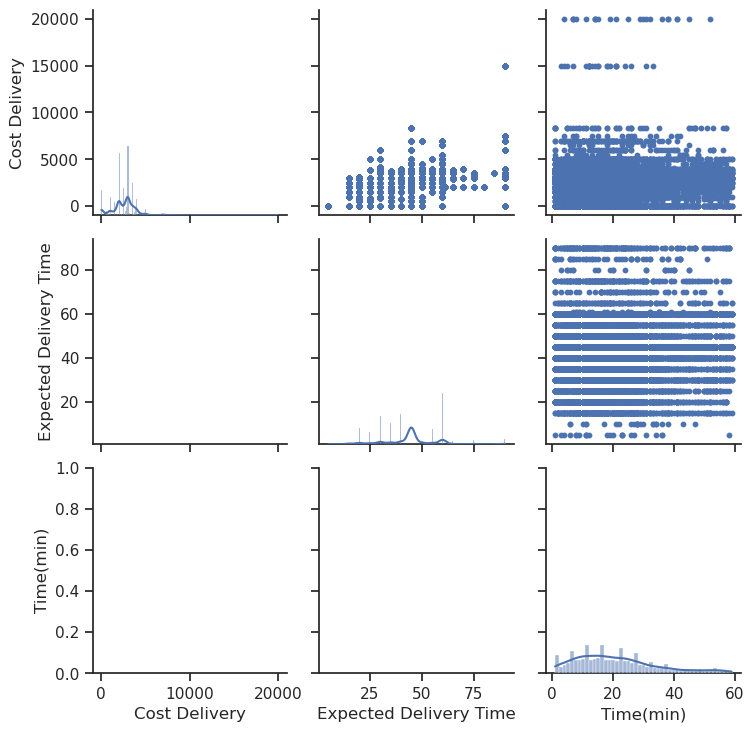

In [5]:
g = sns.PairGrid(data)
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.histplot, kde=True)
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot, cmap="Blues_d")

El resultado anterior no es satisfactorio porque la variable Time(min) tiene datos perdidos y por tanto no aparece graficada. Una solución es eliminar los datos perdidos de la base de datos y volver a hacer el gráfico. Una recomendación para el gráfico es acortar los nombres de las variables, entonces lo haremos de inmediato así

In [6]:
datas = data.rename(columns={'Cost Delivery': 'CD', 'Number of Comments': 'NC', 'Expected Delivery Time': 'EDT', 'Time(min)': 'CT'})
datas.head()

,CD,NC,EDT,CT
0,3500.0,5329,45.0,11
1,3500.0,5329,45.0,12
2,3500.0,5329,45.0,29
3,3500.0,5329,45.0,29
4,3500.0,5329,45.0,22


In [7]:
datas = datas.dropna()
datas.head()

,CD,NC,EDT,CT
0,3500.0,5329,45.0,11
1,3500.0,5329,45.0,12
2,3500.0,5329,45.0,29
3,3500.0,5329,45.0,29
4,3500.0,5329,45.0,22


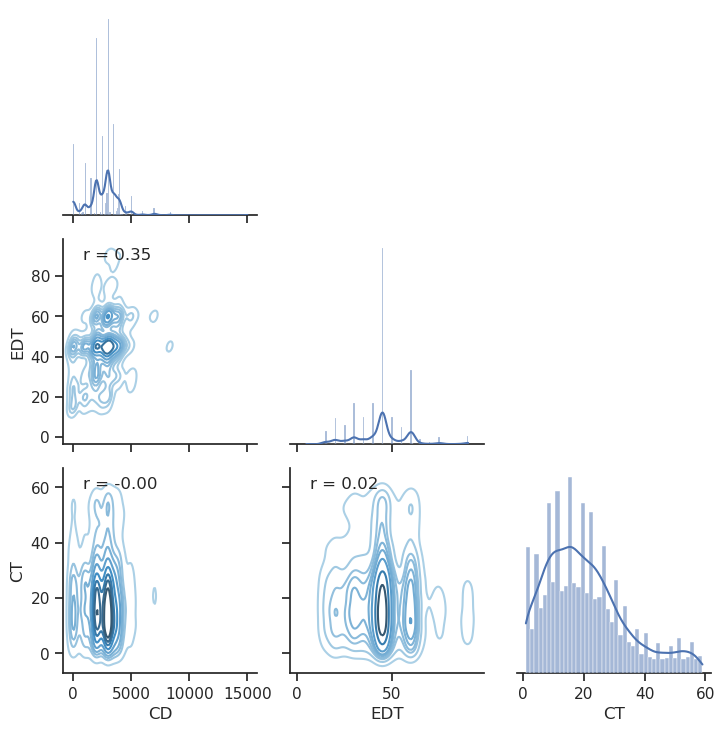

In [8]:
g = sns.PairGrid(datas, diag_sharey=False, corner=True)
g.map_diag(sns.histplot, kde=True)
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot, cmap="Blues_d")

Aunque volvimos a hacer el gráfico, ahora observamos que la variable NC (number of comments) no aparece graficada. Para entender la razón podemos ver qué tipo de variable es

In [9]:
datas.dtypes

CD     float64
NC      object
EDT    float64
CT       int64
dtype: object

Ajá! la variable NC es de tipo object. Debemos configurarla como variable de tipo float64 para que al hacer el gráfico pueda aparecer.

In [10]:
datas['NC'] = datas['NC'].astype(float, errors = 'raise')
datas.dtypes

CD     float64
NC     float64
EDT    float64
CT       int64
dtype: object

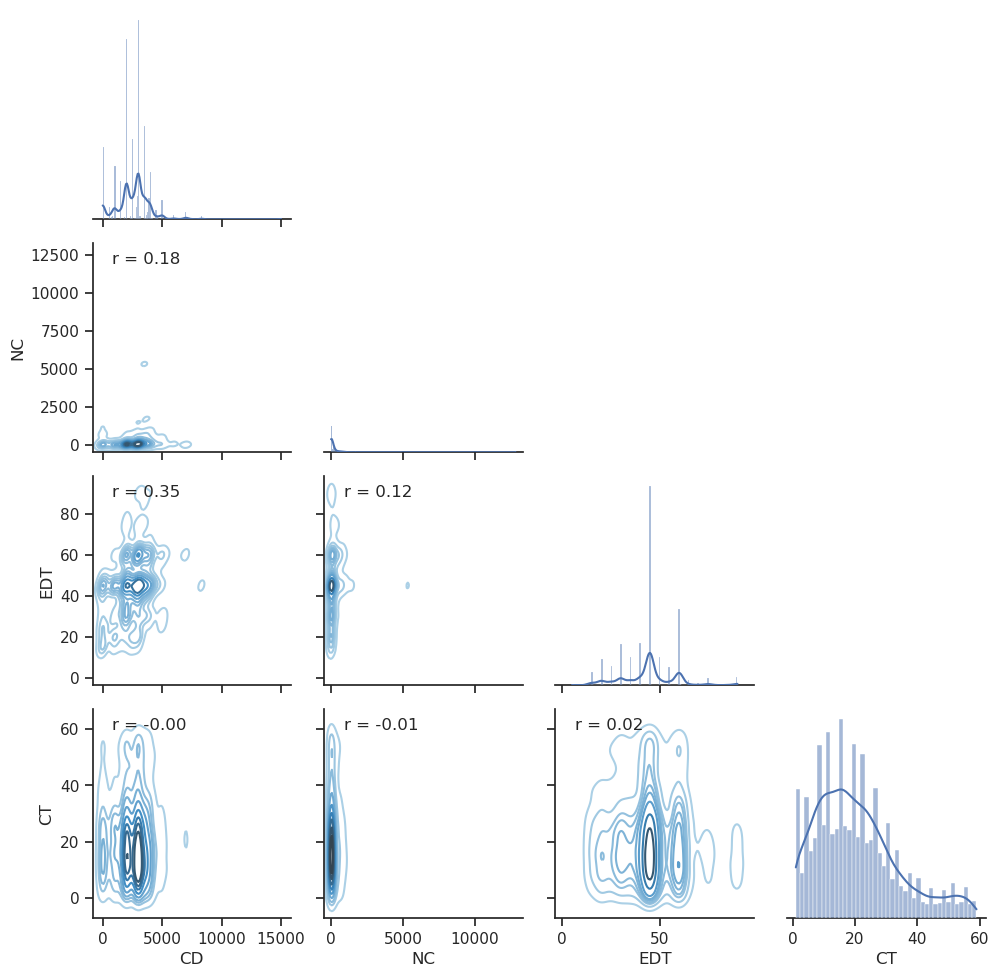

In [11]:
g = sns.PairGrid(datas, diag_sharey=False, corner=True)
g.map_diag(sns.histplot, kde=True)
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot, cmap="Blues_d")

In [12]:
datas.describe()

,CD,NC,EDT,CT
count,14183.000000,14183.000000,14183.000000,14183.000000
mean,2587.525347,200.012480,44.491927,20.758866
std,1407.166800,807.825694,13.989068,13.348167
min,0.000000,0.000000,5.000000,1.000000
25%,2000.000000,3.000000,40.000000,11.000000
50%,2800.000000,24.000000,45.000000,19.000000
75%,3200.000000,125.000000,50.000000,28.000000
max,15000.000000,12832.000000,90.000000,59.000000
